In [123]:
# Install scikit-learn
!pip install scikit-learn

In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
# Load Clean file
path = "/Users/sharonthapa/Global Happiness_ST/Data/Cleaned/happiness_report_cleaned.csv"
df = pd.read_csv(path)

In [129]:
df.head()

,Country,Region,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity
0,Afghanistan,Southern Asia,2015.0,153.0,3.575,0.320,0.303,0.234,0.097,0.365
1,Albania,Central and Eastern Europe,2015.0,95.0,4.959,0.879,0.813,0.357,0.064,0.143
2,Algeria,Middle East and Northern Africa,2015.0,68.0,5.605,0.939,0.618,0.286,0.174,0.078
3,Angola,Sub-Saharan Africa,2015.0,137.0,4.033,0.758,0.167,0.104,0.071,0.123
4,Argentina,Latin America and Caribbean,2015.0,30.0,6.574,1.054,0.787,0.450,0.085,0.115


## Data Cleaning

In [131]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Health (Life Expectancy)', 'Freedom',
       'Trust in Government', 'Generosity'],
      dtype='object')

In [133]:
df.head(20)

,Country,Region,Year,Happiness Rank,Happiness Score,GDP per Capita,Health (Life Expectancy),Freedom,Trust in Government,Generosity
0,Afghanistan,Southern Asia,2015.0,153.0,3.575,0.320,0.303,0.234,0.097,0.365
1,Albania,Central and Eastern Europe,2015.0,95.0,4.959,0.879,0.813,0.357,0.064,0.143
2,Algeria,Middle East and Northern Africa,2015.0,68.0,5.605,0.939,0.618,0.286,0.174,0.078
3,Angola,Sub-Saharan Africa,2015.0,137.0,4.033,0.758,0.167,0.104,0.071,0.123
4,Argentina,Latin America and Caribbean,2015.0,30.0,6.574,1.054,0.787,0.450,0.085,0.115
5,Armenia,Central and Eastern Europe,2015.0,127.0,4.350,0.768,0.730,0.198,0.039,0.079
6,Australia,Australia and New Zealand,2015.0,10.0,7.284,1.334,0.932,0.651,0.356,0.436
7,Austria,Western Europe,2015.0,13.0,7.200,1.337,0.890,0.624,0.187,0.331
8,Azerbaijan,Central and Eastern Europe,2015.0,80.0,5.212,1.024,0.640,0.370,0.161,0.078
9,Bahrain,Middle East and Northern Africa,2015.0,49.0,5.960,1.324,0.747,0.455,0.306,0.174


In [135]:
df.shape

(779, 10)

In [137]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country                     0
Region                      0
Year                        0
Happiness Rank              0
Happiness Score             0
GDP per Capita              0
Health (Life Expectancy)    0
Freedom                     0
Trust in Government         0
Generosity                  0
dtype: int64

In [139]:
dups = df.duplicated()

In [141]:
dups.shape # No dups

(779,)

# Exploring Data

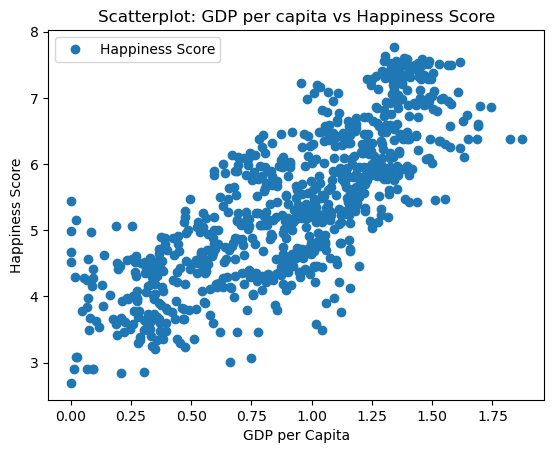

In [143]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'GDP per Capita', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Scatterplot: GDP per capita vs Happiness Score')  
plt.xlabel('GDP per Capita')  
plt.ylabel('Happiness Score')  
plt.show()

#### Hypothesis Statement

##### scatterplot visualization shows that there is a positive correlation between GDP per Capita and Happiness Score.

#### Hypothesis: "Higher GDP per capita leads to a higher Happiness Score."

##### This hypothesis suggests that as a country's GDP per Capita increases, its citizens tend to report higher happiness scores. The linear regression analysis in the following steps will help test whether this relationship is statistically significant.

# Reshaping the Variables into NumPy Arrays

In [145]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP per Capita'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [147]:
X

array([[0.32 ],
       [0.879],
       [0.939],
       [0.758],
       [1.054],
       [0.768],
       [1.334],
       [1.337],
       [1.024],
       [1.324],
       [0.398],
       [1.032],
       [1.308],
       [0.287],
       [0.77 ],
       [0.681],
       [0.832],
       [0.994],
       [0.981],
       [1.012],
       [0.258],
       [0.015],
       [0.46 ],
       [0.423],
       [1.326],
       [0.079],
       [0.342],
       [1.107],
       [0.89 ],
       [0.919],
       [0.239],
       [0.679],
       [0.   ],
       [0.956],
       [1.083],
       [1.208],
       [1.179],
       [1.325],
       [0.44 ],
       [0.895],
       [0.864],
       [0.882],
       [0.765],
       [1.152],
       [0.191],
       [1.29 ],
       [1.278],
       [1.06 ],
       [0.742],
       [1.328],
       [0.546],
       [1.154],
       [0.746],
       [0.174],
       [0.267],
       [0.595],
       [1.386],
       [1.121],
       [1.302],
       [0.645],
       [0.828],
       [1.009],
       [

In [149]:
y

array([[3.575],
       [4.959],
       [5.605],
       [4.033],
       [6.574],
       [4.35 ],
       [7.284],
       [7.2  ],
       [5.212],
       [5.96 ],
       [4.694],
       [5.813],
       [6.937],
       [3.34 ],
       [5.253],
       [5.89 ],
       [4.949],
       [4.332],
       [6.983],
       [4.218],
       [3.587],
       [2.905],
       [3.819],
       [4.252],
       [7.427],
       [3.678],
       [3.667],
       [6.67 ],
       [5.14 ],
       [6.477],
       [3.956],
       [3.989],
       [4.517],
       [7.226],
       [5.759],
       [5.689],
       [6.505],
       [7.527],
       [4.369],
       [4.885],
       [5.975],
       [4.194],
       [6.13 ],
       [5.429],
       [4.512],
       [7.406],
       [6.575],
       [3.896],
       [4.297],
       [6.75 ],
       [4.633],
       [4.857],
       [6.123],
       [3.656],
       [4.518],
       [4.788],
       [5.474],
       [4.8  ],
       [7.561],
       [4.565],
       [5.399],
       [4.686],
       [

In [151]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [153]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [155]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [157]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

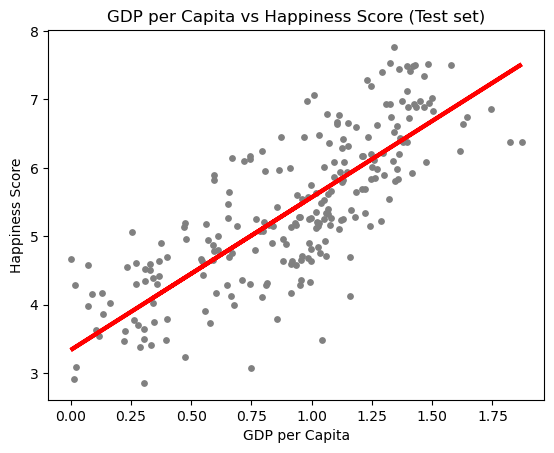

In [159]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [161]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [163]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_) #a coefficient that tells you how the y variable changes when X changes.
print('Mean squared error: ', rmse) # how close a regression line is to a set of points (i.e., its accuracy)
print('R2 score: ', r2) # a metric that tells you how well the model explains the variance in the data.

Slope: [[2.23398491]]
Mean squared error:  0.4711956513808589
R2 score:  0.6090378168792779


### Observation
#### Slope indicates a positive relationship (as X rises, so does y)
#### MSE indicates a small MSE, indicating the regression line passes fairly close to the observations, making it a good fit
#### R2 score indicates the model is not the best fit but is about 61% fit

In [165]:
y_predicted

array([[5.4748145 ],
       [5.14195075],
       [7.40944543],
       [5.05482534],
       [6.94701056],
       [5.72278682],
       [6.42649207],
       [6.21426351],
       [5.45917661],
       [6.04224667],
       [4.85153271],
       [5.04142143],
       [6.37064245],
       [4.80238504],
       [6.45553388],
       [3.83506958],
       [6.06235253],
       [4.3935658 ],
       [5.74959464],
       [6.40191824],
       [5.71831886],
       [5.85012396],
       [6.85765116],
       [3.37040071],
       [5.80767825],
       [6.38404636],
       [6.14500997],
       [4.02272431],
       [5.90597359],
       [4.02272431],
       [6.11373418],
       [4.65717602],
       [4.57675257],
       [6.11820215],
       [5.47928247],
       [3.69656251],
       [4.79568309],
       [4.09644581],
       [5.85459193],
       [5.26481992],
       [4.10984972],
       [4.15006145],
       [6.24107132],
       [5.77416848],
       [6.33489869],
       [5.6222575 ],
       [4.92078624],
       [5.378

In [167]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.548,5.474814
1,4.291,5.141951
2,6.375,7.409445
3,5.253,5.054825
4,6.239,6.947011
5,5.395,5.722787
6,6.403,6.426492
7,5.227,6.214264
8,4.286,5.459177
9,6.168,6.042247


#### The model is doing a great job of explaining the relationship between the “GDP per Capita” and “Happiness Score” variables as the difference is not by much.

### Comparing how the regression fits the training set

In [169]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [171]:
mse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [173]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.23398491]]
Mean squared error:  0.4711956513808589
R2 score:  0.6293578941624816


### The result? 

#### Model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.62) meaning I have not overfit the model.

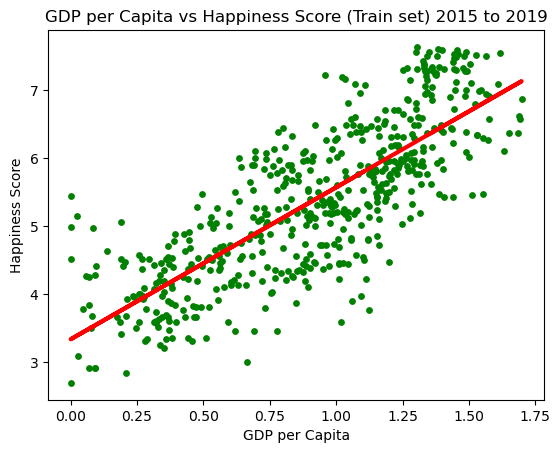

In [175]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Train set) 2015 to 2019')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

### From the Train set, we can see that alothough gdp PER capita plays a role in Happiness Score, we can see some variations when the GDP per capita is low, there are some countries that still seem to have a high Happiness Score.

## Observations:
### The regression model reasonably predicts happiness scores based on GDP per Capita, but with a moderate level of accuracy.
### The scatterplot and regression line indicate a trend, but the dispersion of data points around the line shows that other variables likely contribute significantly to happiness.
### The model would likely improve with additional predictors, such as health expectancy, or Trust in Government, which were present in the dataset.
### Potential data bias: The dataset might not represent all global populations equally, potentially skewing the model’s performance in certain regions.

### Future Improvements:
#### Implement multiple regression by including additional predictors.
#### Consider non-linear models if the relationship isn't purely linear.
#### Check for outliers or data quality issues that may impact predictions.
#### Overall, while GDP per Capita has a significant impact on happiness, it is not the sole determinant. A more comprehensive model with multiple factors would likely yield better predictive performance.